# Learning NumPy

In [39]:
import numpy as np
np.version.full_version

'1.19.1'

In [28]:
a = np.array([0,1,2,3,4,5])
a

array([0, 1, 2, 3, 4, 5])

In [29]:
a.ndim

1

In [30]:
a.shape

(6,)

In [31]:
b = a.reshape((3,2))
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [32]:
b.ndim

2

In [33]:
b.shape

(3, 2)

In [34]:
b[1][0] = 77
b

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [35]:
a

array([ 0,  1, 77,  3,  4,  5])

In [36]:
c = a.reshape((3,2)).copy()
c

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [37]:
c[0][0] = -99
a

array([ 0,  1, 77,  3,  4,  5])

In [38]:
c

array([[-99,   1],
       [ 77,   3],
       [  4,   5]])

In [39]:
d = np.array([1,2,3,4,5])
d*2

array([ 2,  4,  6,  8, 10])

In [40]:
d**2

array([ 1,  4,  9, 16, 25], dtype=int32)

In [41]:
[1,2,3,4,5]*2

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [42]:
[1,2,3,4,5]**2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

# Indexing

In [43]:
a[np.array([2,3,4])]

array([77,  3,  4])

In [44]:
a>4

array([False, False,  True, False, False,  True])

In [45]:
a[a>4]

array([77,  5])

In [31]:
a[a>4] = 4
a

array([0, 1, 4, 3, 4, 4])

In [32]:
a.clip(0,4)

array([0, 1, 4, 3, 4, 4])

# Handling nonexisting values

In [34]:
c = np.array([1, 2, np.NAN, 3, 4]) # let's pretend we have read this from a text file
c

array([ 1.,  2., nan,  3.,  4.])

In [35]:
np.isnan(c)

array([False, False,  True, False, False])

In [36]:
c[~np.isnan(c)]

array([1., 2., 3., 4.])

In [37]:
np.mean(c[~np.isnan(c)])

2.5

# Comparing the runtime

In [40]:
import timeit
normal_py_sec = timeit.timeit('sum(x*x for x in range(1000))', number=10000)
naive_np_sec = timeit.timeit('sum(na*na)', setup="import numpy as np; na=np.arange(1000)", number=10000)
good_np_sec = timeit.timeit('na.dot(na)', setup="import numpy as np; na=np.arange(1000)", number=10000)
print("Normal Python: %f sec" % normal_py_sec)
print("Naive NumPy: %f sec" % naive_np_sec)
print("Good NumPy: %f sec" % good_np_sec)

Normal Python: 0.792952 sec
Naive NumPy: 1.508449 sec
Good NumPy: 0.013259 sec


In [41]:
a = np.array([1,2,3])
a.dtype

dtype('int32')

In [42]:
np.array([1, "stringy"])

array(['1', 'stringy'], dtype='<U11')

In [43]:
np.array([1, "stringy", {1, 2, 3}])

array([1, 'stringy', {1, 2, 3}], dtype=object)

# Learning SciPy

In [51]:
import scipy, numpy
scipy.version.full_version

'1.5.4'

In [52]:
scipy.dot is numpy.dot

False

# Our first (tiny) application of machine learning:

# 1. Reading in the data

In [53]:
import scipy as sp 
import numpy as np
data = np.genfromtxt("web_traffic.tsv", delimiter="\t")
"""" the reason np.genfromtxt is used instead of sp.genfromtxt:
ipython-input-53-c83431deec26>:2: DeprecationWarning: scipy.genfromtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.genfromtxt instead data = sp.genfromtxt("web_traffic.tsv", delimiter="\t")"""
print(data[:10])

[[1.00000000e+00 2.27333106e+03]
 [2.00000000e+00 1.65725549e+03]
 [3.00000000e+00            nan]
 [4.00000000e+00 1.36684644e+03]
 [5.00000000e+00 1.48923438e+03]
 [6.00000000e+00 1.33802002e+03]
 [7.00000000e+00 1.88464734e+03]
 [8.00000000e+00 2.28475415e+03]
 [9.00000000e+00 1.33581091e+03]
 [1.00000000e+01 1.02583240e+03]]


In [54]:
print(data.shape)

(743, 2)


# 2. Preprocessing and cleaning the data

In [55]:
x = data[:,0]
y = data[:,1]
np.sum(np.isnan(y))

8

In [56]:
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

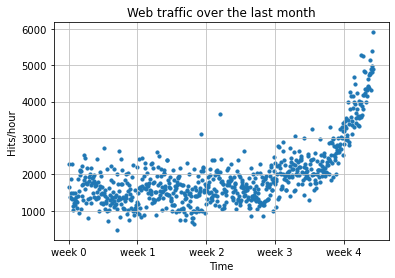

In [57]:
import matplotlib.pyplot as plt
# plot the (x,y) points with dots of size 10
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight=False)
# draw a slightly opaque, dashed grid
plt.grid(True, linestyle='-', color='0.75')
plt.show()

# 3. Choosing the right model and learning algorithm

In [161]:
def error(f, x, y):
    return np.sum((f(x)-y)**2)

In [162]:
fp1, residuals, rank, sv, rcond = np.polyfit(x, y, 1, full=True)

In [163]:
print("Model parameters: %s" % fp1)

Model parameters: [  2.58462016 996.50674246]


In [164]:
print(residuals)

[3.19531507e+08]


In [165]:
f1 = sp.poly1d(fp1)
print(error(f1, x, y))

319531507.0208318


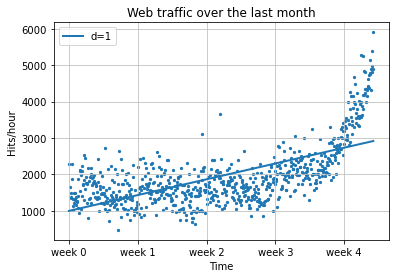

In [166]:
fx = np.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=2)
plt.legend(["d=%i" % f1.order], loc="upper left")

plt.scatter(x, y, s=5)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight=False)
# draw a slightly opaque, dashed grid
plt.grid(True, linestyle='-', color='0.75')
plt.show()

# Towards some advanced stuff

In [167]:
f2p = np.polyfit(x, y, 2)
print(f2p)

[ 1.05605675e-02 -5.29774287e+00  1.98466917e+03]


In [168]:
f2 = sp.poly1d(f2p)
print(error(f2, x, y))

181347660.75761026


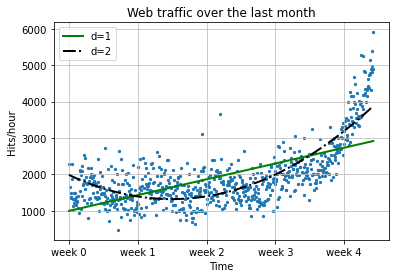

In [169]:
fx = np.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), color='g', linewidth=2)
plt.plot(fx, f2(fx), color='k', linestyle='dashdot', linewidth=2)
plt.legend(["d=%i" % f1.order, "d=%i" % f2.order], loc="upper left")

plt.scatter(x, y, s=5)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight=False)
# draw a slightly opaque, dashed grid
plt.grid(True, linestyle='-', color='0.75')
plt.show()

In [170]:
f3p = np.polyfit(x, y, 3)
f3 = sp.poly1d(f3p)

In [171]:
f10p = np.polyfit(x, y, 10)
f10 = sp.poly1d(f10p)

In [172]:
f53p = np.polyfit(x, y, 53)
f53 = sp.poly1d(f53p)

C:\Users\neha\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


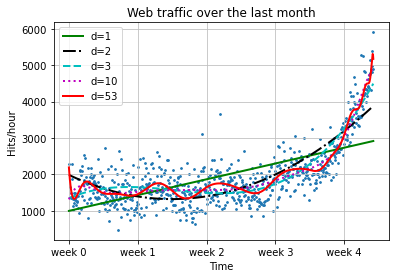

In [173]:
fx = np.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), color='g', linewidth=2)
plt.plot(fx, f2(fx), color='k', linestyle='dashdot', linewidth=2)
plt.plot(fx, f3(fx), color='c', linestyle='dashed', linewidth=2)
plt.plot(fx, f10(fx), color='m', linestyle='dotted', linewidth=2)
plt.plot(fx, f53(fx), color='r', linewidth=2)
plt.legend(["d=%i" % f1.order, "d=%i" % f2.order, "d=%i" % f3.order, "d=%i" % f10.order, "d=%i" % f53.order], loc="upper left")

plt.scatter(x, y, s=3)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight=False)
# draw a slightly opaque, dashed grid
plt.grid(True, linestyle='-', color='0.75')
plt.show()

In [174]:
print(error(f1, x, y))
print(error(f2, x, y))
print(error(f3, x, y))
print(error(f10, x, y))
print(error(f53, x, y))

319531507.0208318
181347660.75761026
140576460.87968162
123426935.75171934
110768247.48243403


# Stepping back to go forward – another look at our data

In [175]:
inflection = int(3.5*7*24) # calculate the inflection point in hours
xa = x[:inflection] # data before the inflection point
ya = y[:inflection]
xb = x[inflection:] # data after
yb = y[inflection:]

fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error inflection = %f" % (fa_error + fb_error))

Error inflection = 134390576.312955


<ipython-input-175-ba031fb54772>:7: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fa = sp.poly1d(sp.polyfit(xa, ya, 1))
<ipython-input-175-ba031fb54772>:8: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fb = sp.poly1d(sp.polyfit(xb, yb, 1))


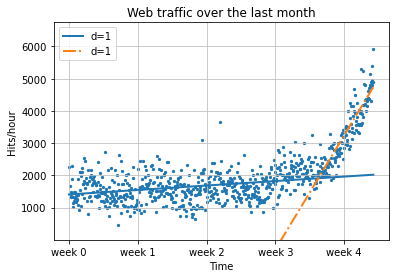

In [176]:
fx = np.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, fa(fx), linewidth=2)
plt.plot(fx, fb(fx), linestyle='dashdot', linewidth=2)
plt.legend(["d=%i" % fa.order, "d=%i" % fb.order], loc="upper left")

plt.scatter(x, y, s=5)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight=False)
plt.ylim(bottom = 1)
# draw a slightly opaque, dashed grid
plt.grid(True, linestyle='-', color='0.75')
plt.show()

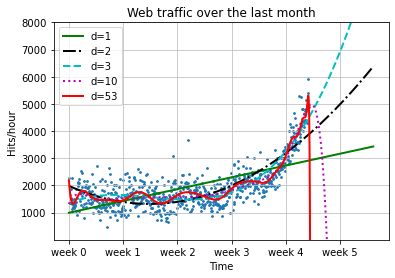

In [201]:
fx = np.linspace(0,x[-1]+200, 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), color='g', linewidth=2)
plt.plot(fx, f2(fx), color='k', linestyle='dashdot', linewidth=2)
plt.plot(fx, f3(fx), color='c', linestyle='dashed', linewidth=2)
plt.plot(fx, f10(fx), color='m', linestyle='dotted', linewidth=2)
plt.plot(fx, f53(fx), color='r', linewidth=2)
plt.legend(["d=%i" % f1.order, "d=%i" % f2.order, "d=%i" % f3.order, "d=%i" % f10.order, "d=%i" % f53.order], loc="upper left")

plt.scatter(x, y, s=3)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight=False)
plt.ylim(bottom = 1)
plt.ylim(top = 8000)

# draw a slightly opaque, dashed grid
plt.grid(True, linestyle='-', color='0.75')
plt.show()

<ipython-input-238-3d567d785fc8>:3: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fc = sp.poly1d(sp.polyfit(xb, yb, 2))
<ipython-input-238-3d567d785fc8>:4: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fd = sp.poly1d(sp.polyfit(xb, yb, 3))
<ipython-input-238-3d567d785fc8>:5: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fe = sp.poly1d(sp.polyfit(xb, yb, 10))
<ipython-input-238-3d567d785fc8>:5: RankWarning: Polyfit may be poorly conditioned
  fe = sp.poly1d(sp.polyfit(xb, yb, 10))
<ipython-input-238-3d567d785fc8>:6: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  ff = sp.poly1d(sp.polyfit(xb, yb, 53))
<ipython-input-238-3d567d785fc8>:6: RankWarning: Polyfit may be poorly conditioned
  ff = sp.poly1d(sp.polyfit(xb, yb, 53))


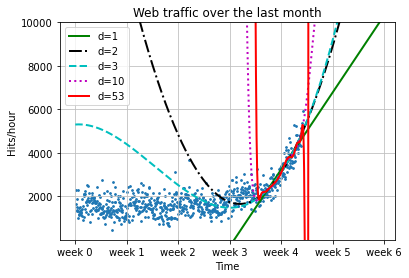

In [238]:
fx = np.linspace(0,x[-1]+250, 1000) # generate X-values for plotting

fc = sp.poly1d(sp.polyfit(xb, yb, 2))
fd = sp.poly1d(sp.polyfit(xb, yb, 3))
fe = sp.poly1d(sp.polyfit(xb, yb, 10))
ff = sp.poly1d(sp.polyfit(xb, yb, 53))
    
plt.plot(fx, fb(fx), color='g', linewidth=2)
plt.plot(fx, fc(fx), color='k', linestyle='dashdot', linewidth=2)
plt.plot(fx, fd(fx), color='c', linestyle='dashed', linewidth=2)
plt.plot(fx, fe(fx), color='m', linestyle='dotted', linewidth=2)
plt.plot(fx, ff(fx), color='r', linewidth=2)

plt.legend(["d=%i" % fb.order, "d=%i" % fc.order, "d=%i" % fd.order, "d=%i" % fe.order, "d=%i" % ff.order], loc="upper left")

plt.scatter(x, y, s=3)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight=False)
plt.ylim(bottom = 1)
plt.ylim(top = 10000)
# draw a slightly opaque, dashed grid
plt.grid(True, linestyle='-', color='0.75')
plt.show()